In [39]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [40]:
df=pd.read_csv("C:\\Users\\SHWETA BHOYAR\\Downloads\\winequality_red.csv")

Now let’s look at the first five rows of the dataset.

In [41]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Let’s explore the type of data present in each of the columns present in the dataset.



In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Now we’ll explore the descriptive statistical measures of the dataset.

In [43]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### Exploratory Data Analysis
- EDA is an approach to analysing the data using visual techniques. It is used to discover trends, and patterns, or to check assumptions with the help of statistical summaries and graphical representations.  Now let’s check the number of null values in the dataset columns wise.

In [44]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [45]:
# if null values are there use this method 
for col in df.columns:
    if df[col].isnull().sum()>0:
        df[col]=df[col].fillna(df[col].mean())
df.isnull().sum().sum()
    

0

- Let’s draw the histogram to visualise the distribution of the data with continuous values in the columns of the dataset.

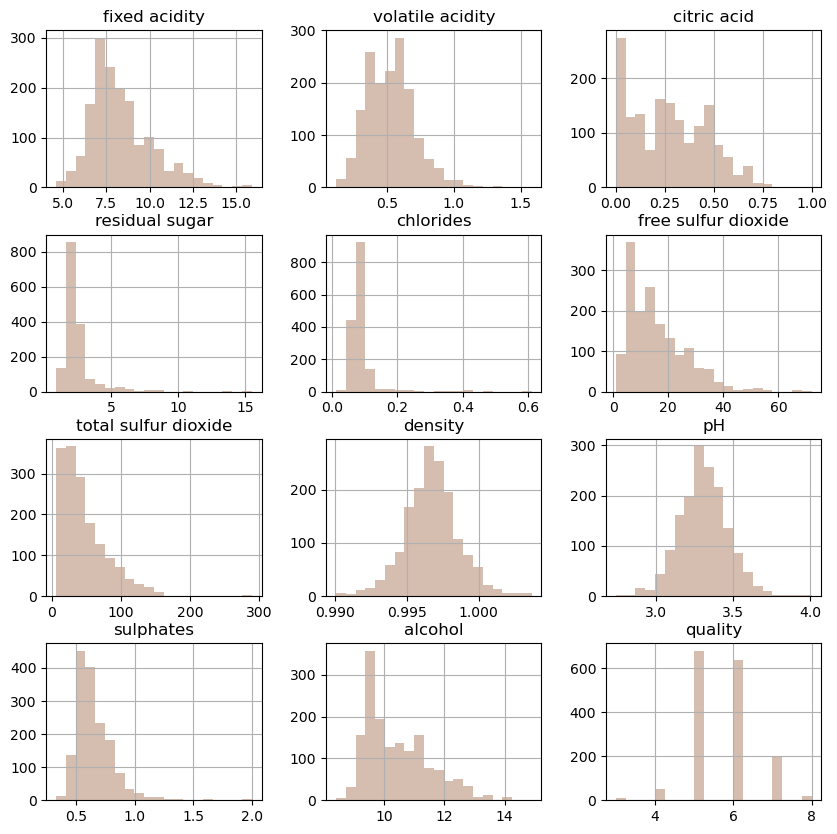

In [54]:
colors= ('#d5bdaf')
df.hist(bins=20,figsize=(10,10),color= colors)
plt.show()

Now let’s draw the count plot to visualise the number data for each quality of wine.

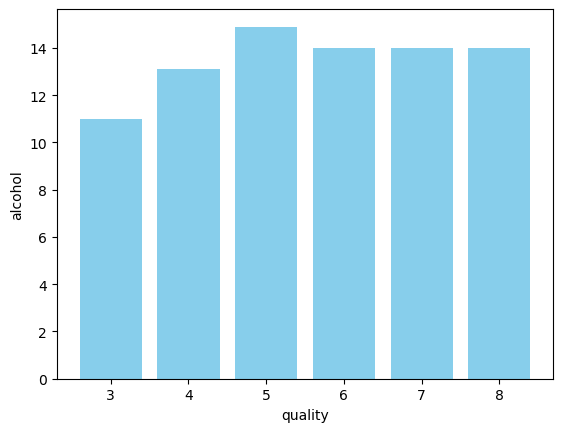

In [56]:
plt.bar(df['quality'], df['alcohol'],color= 'skyblue')

plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()

There are times the data provided to us contains redundant features they do not help with increasing the model’s performance that is why we remove them before using them to train our model.

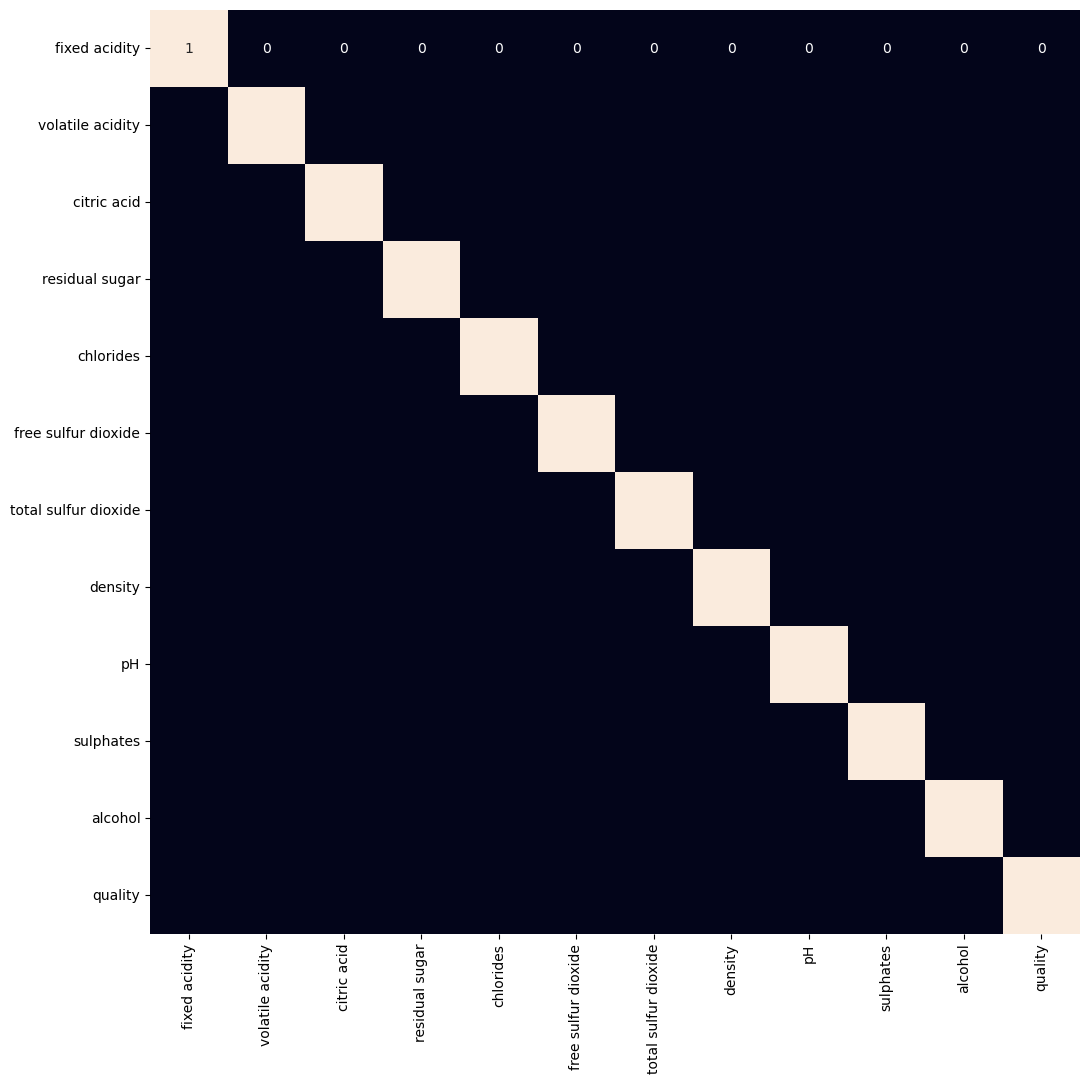

In [58]:
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr() > 0.7, annot=True, cbar=False)
plt.show()

From the above heat map we can conclude that the ‘total sulphur dioxide’ and ‘free sulphur dioxide‘ are highly correlated features so, we will remove them.



In [59]:
df = df.drop('total sulfur dioxide', axis=1)

### Model Development
- Let’s prepare our data for training and splitting it into training and validation data so, that we can select which model’s performance is best as per the use case. We will train some of the state of the art machine learning classification models and then select best out of them using validation data.

In [60]:
df['best quality'] = [1 if x > 5 else 0 for x in df.quality]


We have a column with object data type as well let’s replace it with the 0 and 1 as there are only two categories.


In [61]:
df.replace({'white': 1, 'red': 0}, inplace=True)


After segregating features and the target variable from the dataset we will split it into 80:20 ratio for model selection.

In [63]:
features = df.drop(['quality', 'best quality'], axis=1)
target = df['best quality']
 
xtrain, xtest, ytrain, ytest = train_test_split(
    features, target, test_size=0.2, random_state=40)
xtrain.shape, xtest.shape

((1279, 10), (320, 10))

Normalising the data before training help us to achieve stable and fast training of the model.

In [64]:
norm = MinMaxScaler()
xtrain = norm.fit_transform(xtrain)
xtest = norm.transform(xtest)

As the data has been prepared completely let’s train some state of the art machine learning model on it.

In [95]:
models = [LogisticRegression(), XGBClassifier(), SVC(kernel='rbf')]
 
for i in range(3):
    models[i].fit(xtrain, ytrain)
 
    print(f'{models[i]} : ')
    print('Training Accuracy : ', metrics.roc_auc_score(ytrain, models[i].predict(xtrain)))
    print('Validation Accuracy : ', metrics.roc_auc_score(
        ytest, models[i].predict(xtest)))
    print()

LogisticRegression() : 
Training Accuracy :  0.7286886534333447
Validation Accuracy :  0.765345444536196

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training Accuracy :  1.0
Validation Accuracy :  0.8321733317604498

SVC() : 
Training Accuracy :  0.7699408577589806
Validation Accur

### Model Evaluation
- From the above accuracies we can say that Logistic Regression and SVC() classifier performing better on the validation data with less difference between the validation and training data. Let’s plot the confusion matrix as well for the validation data using the Logistic Regression model.

In [96]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix



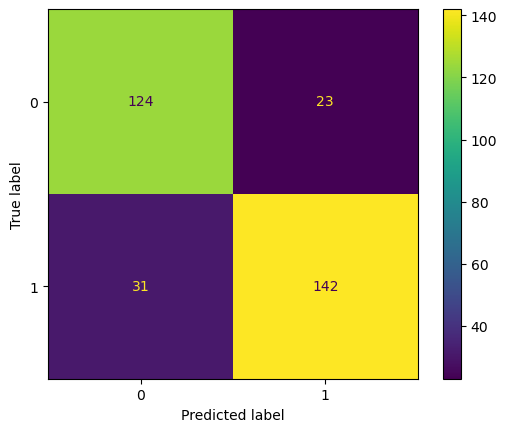

In [99]:

# Assuming models[1] is your trained model, xtest is your test data, and ytest are the true labels
model = models[1]
y_pred = model.predict(xtest)

# Compute the confusion matrix
cm = confusion_matrix(ytest, y_pred)

# Create the ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Plot the confusion matrix
disp.plot()

# Display the plot
plt.show()


Let’s also print the classification report for the best performing model.

In [100]:
print(metrics.classification_report(ytest,
                                    models[1].predict(xtest)))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       147
           1       0.86      0.82      0.84       173

    accuracy                           0.83       320
   macro avg       0.83      0.83      0.83       320
weighted avg       0.83      0.83      0.83       320

